In [1]:
!pip install calmap

Defaulting to user installation because normal site-packages is not writeable


In [3]:
pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=5f80a189dd7b4c0a302224986d5256cad93702454810570332dc4f3e1ec608a3
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline

C:\Users\parth\AppData\Local\Temp\ipykernel_17164\3921231354.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
df=pd.read_csv("D:/Supermarket Sales Analysis/supermarket_sales - Sheet1.csv")

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
#type of date and time is object so we need to change it
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])

In [13]:
#we can put the date column as index of whole dataset
df.set_index(df["Date"],inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-02-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-02-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-02-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-02-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-02-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
#fetch the summary statistics of whole dataset
df.describe()
     

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


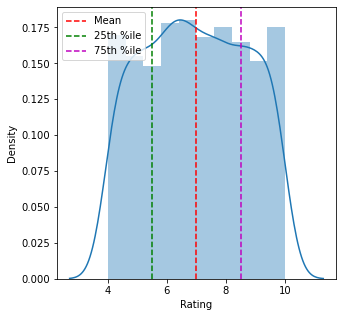

In [15]:
#UNIVARIATE ANALYSIS
#showing distribution of customer rating
plt.figure(figsize=(5,5))
sns.distplot(df["Rating"])
#get a line representing mean
plt.axvline(x=np.mean(df["Rating"]),color="r",ls="--",label="Mean")
plt.axvline(x=np.percentile(df["Rating"],25),color="g",ls="--",label="25th %ile")
plt.axvline(x=np.percentile(df["Rating"],75),color="m",ls="--",label="75th %ile")
plt.legend(loc="upper left")

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Time'}>],
       [<AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>,
        <AxesSubplot:title={'center':'gross income'}>],
       [<AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

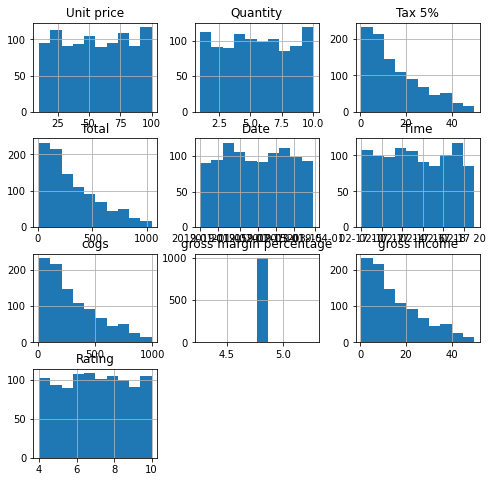

In [16]:
#getting histograms for each possible features
df.hist(figsize=(8,8))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

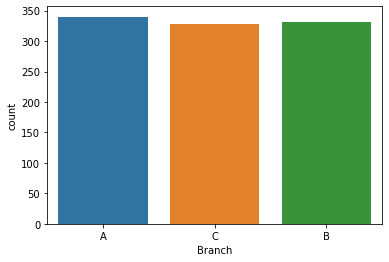

In [17]:
#difference of aggregate sales number between different branches
sns.countplot(df["Branch"])

In [18]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

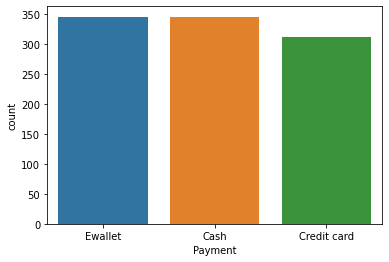

In [19]:
#difference of aggregate sales number between different Payment Methods
sns.countplot(df["Payment"])

In [20]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

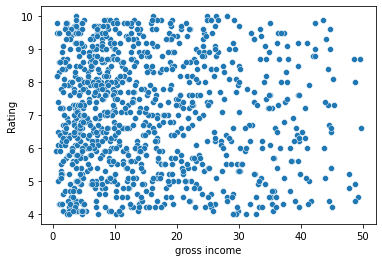

In [21]:
#BIVARIATE ANALYSIS
#relationship between gross income and customer rating
sns.scatterplot(df["gross income"],df["Rating"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

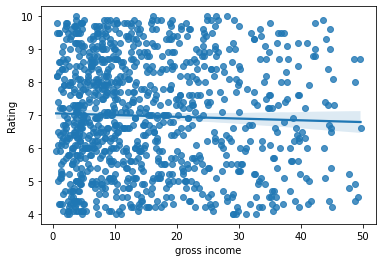

In [22]:
#viewing the trend line in scatter plot is done by Regression Plot
sns.regplot(df["gross income"],df["Rating"])
#the trend line seems to be a flat line which means there is not much relation between both parameters
     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

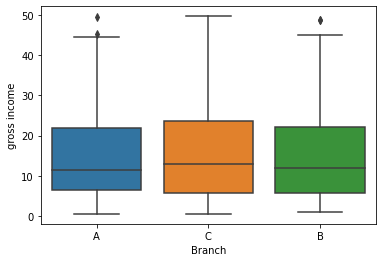

In [23]:
sns.boxplot(df["Branch"],df["gross income"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='gross income'>

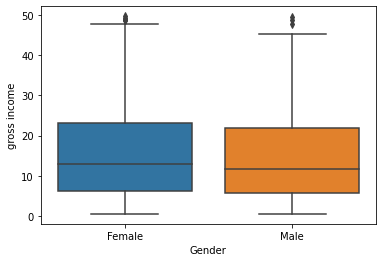

In [24]:
#relationship between gross income and gender
sns.boxplot(df["Gender"],df["gross income"],)

In [25]:
#each date rows are not not unique so we have to take mean of all values in one single date
df_groupby=df.groupby(df.index).mean()
df_groupby.head()
     

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='gross income'>

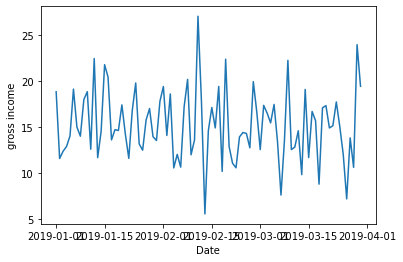

In [26]:
#for analysing line plot we need unique values for each date row so groupby was used
#date time trend in gross income
sns.lineplot(df_groupby.index,df_groupby["gross income"])

In [28]:
#viewing how many rows are duplicated and which are not
df.duplicated().sum()

0

In [29]:
#viewing the rows that are duplicated 
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,


In [30]:
#removing all duplicate values
df.drop_duplicates(inplace=True)

In [31]:
#viewing which rows have missing values and which don't
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [32]:
#filling missing values with value 0
df.fillna(0,inplace=True)

In [33]:
#here filling is only of numerical columns as mean of categorical column is not possible
df.fillna(df.mean(),inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_17164\3304967494.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(),inplace=True)
C:\Users\parth\AppData\Local\Temp\ipykernel_17164\3304967494.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [34]:
df.mode()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,101-17-6199,A,Yangon,Member,Female,Fashion accessories,83.77,10.0,4.1540,87.2340,2019-02-07,2023-02-17 14:42:00,Ewallet,83.08,4.761905,4.1540,6.0
1,101-81-4070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4640,93.7440,NaT,2023-02-17 19:48:00,NaN,89.28,NaN,4.4640,NaN
2,102-06-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3770,175.9170,NaT,NaT,NaN,167.54,NaN,8.3770,NaN
3,102-77-2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0045,189.0945,NaT,NaT,NaN,180.09,NaN,9.0045,NaN
4,105-10-6182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3260,216.8460,NaT,NaT,NaN,206.52,NaN,10.3260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
996,895-03-6665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
997,895-66-0685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
998,896-34-0956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [35]:
#filling null values of categorical columns can be done using mode
#using 1st row of df.mode()
df.fillna(df.mode().iloc[0],inplace=True)

In [36]:
#correlation between 2 individual features
np.corrcoef(df["gross income"],df["Rating"])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [37]:
#correlation matrix
corr_matrix=df.corr()
#rounding correlation values of correlation matrix to 2 decimal points
df_round=np.round(corr_matrix,2)
df_round

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<AxesSubplot:>

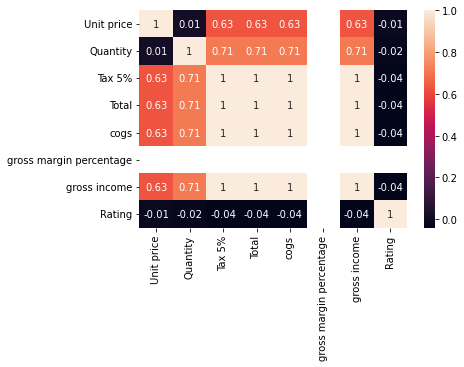

In [38]:
#plotting correlation matrix on heatmap
#annot=>gives us specific correlation values for each small part in heatmap
#colorbar=>reference for variation of colors
hm=sns.heatmap(df_round,annot=True)
hm